In [2]:
import numpy as np
from src.Mondrian_matrix_utils import simulate_y, simulate, simulate_best
import pickle
import matplotlib.pyplot as plt

n = 20000
dim_in = 25
x_train = np.random.rand(n,dim_in)*2 - 1
y_train = simulate_y(x_train)

x_test = np.random.rand(5000,dim_in)*2 - 1
y_test = simulate_y(x_test)

sample_range = [100, 1000, 2500, 5000, 7500, 10000, 15000, 20000]

M = 100                      # number of Mondrian trees to use
lifetime_max = 0.1          # terminal lifetime
weights_lifetime = 2*1e-6   # lifetime for which weights should be plotted
delta = 0.1              # ridge regression delta

number of training samples: 100
Simulation: 0
Test mean squared error before transformation: 0.3446092881177351


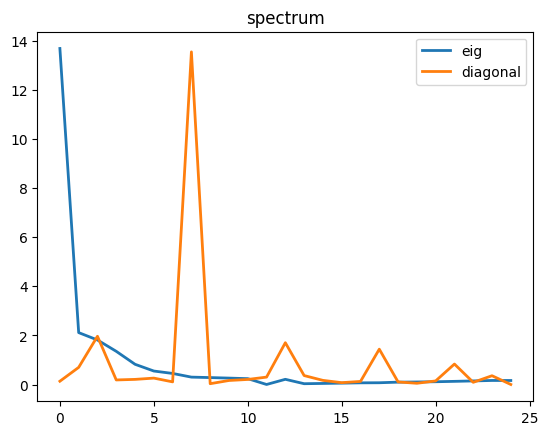

Test mean squared error after transformation: 0.3550422189877779
Simulation: 1
Test mean squared error before transformation: 0.3451583986445154


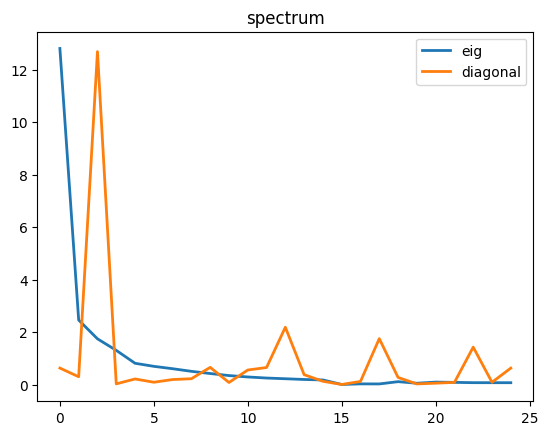

Test mean squared error after transformation: 0.3296972584723442
Simulation: 2
Test mean squared error before transformation: 0.34261274777058837


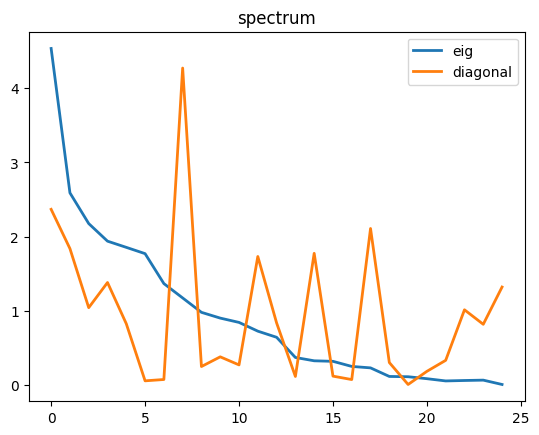

Test mean squared error after transformation: 0.3442018334065752
Simulation: 3
Test mean squared error before transformation: 0.34474253202310295


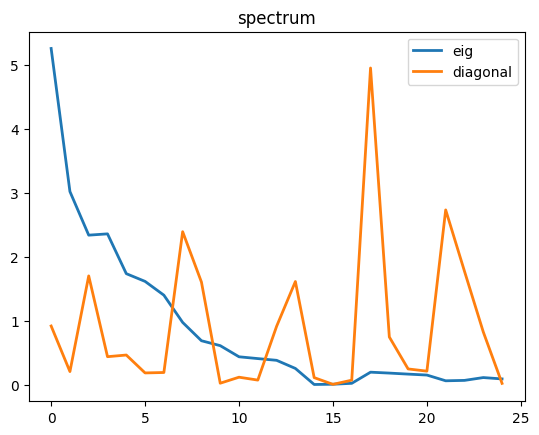

Test mean squared error after transformation: 0.35407928507837294
Simulation: 4
Test mean squared error before transformation: 0.3419674060116015


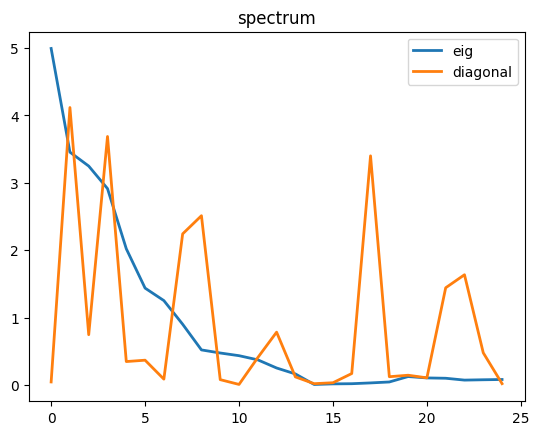

Test mean squared error after transformation: 0.3378217787645688
number of training samples: 1000
Simulation: 0
Test mean squared error before transformation: 0.3420218952194333


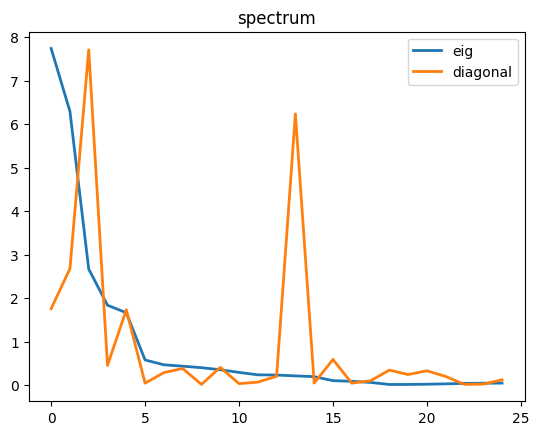

Test mean squared error after transformation: 0.32076256365665534
Simulation: 1
Test mean squared error before transformation: 0.34430740060846776


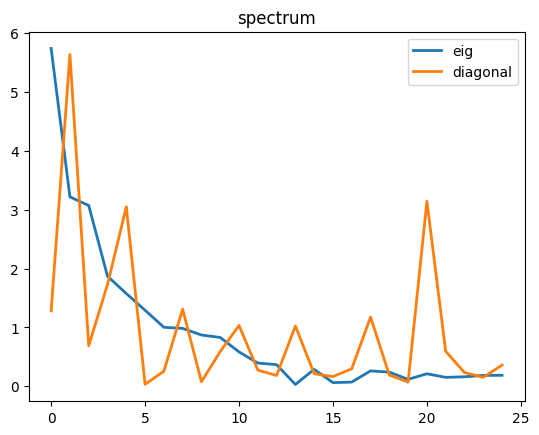

Test mean squared error after transformation: 0.32445361642746573
Simulation: 2
Test mean squared error before transformation: 0.3421005551267831


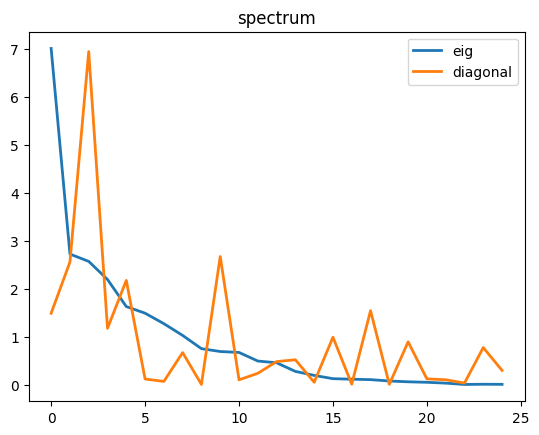

Test mean squared error after transformation: 0.32117998520767815
Simulation: 3
Test mean squared error before transformation: 0.34284994076658276


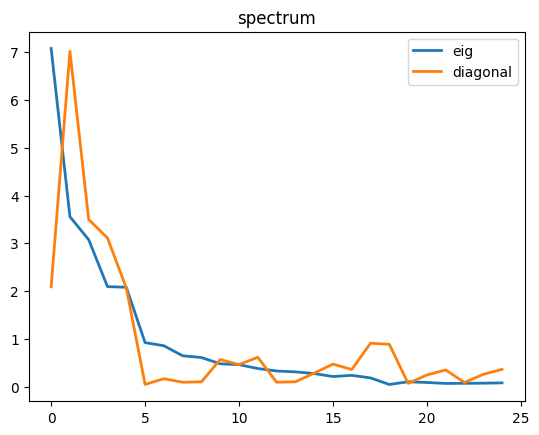

Test mean squared error after transformation: 0.30478965292600024
Simulation: 4
Test mean squared error before transformation: 0.3438071647663914


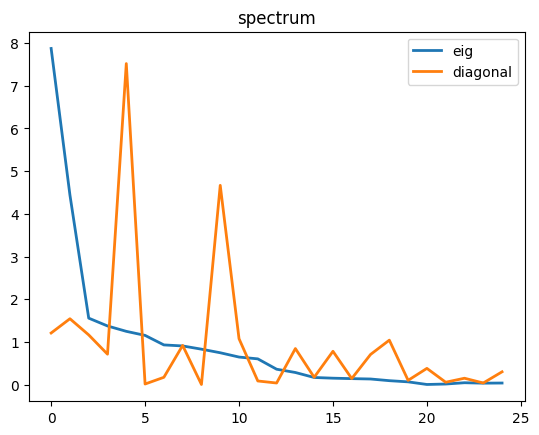

Test mean squared error after transformation: 0.32719175273520557
number of training samples: 2500
Simulation: 0
Test mean squared error before transformation: 0.34235711331486196


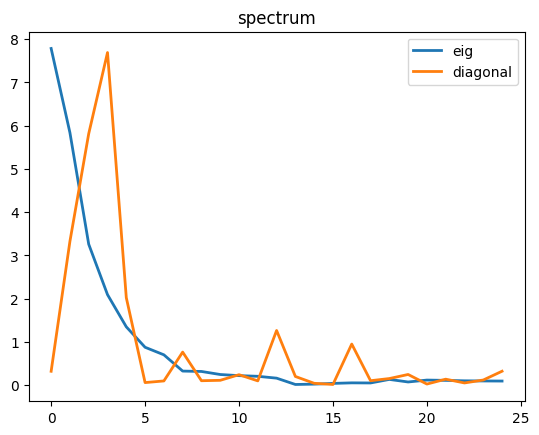

Test mean squared error after transformation: 0.31311226690489646
Simulation: 1
Test mean squared error before transformation: 0.34491719615825694


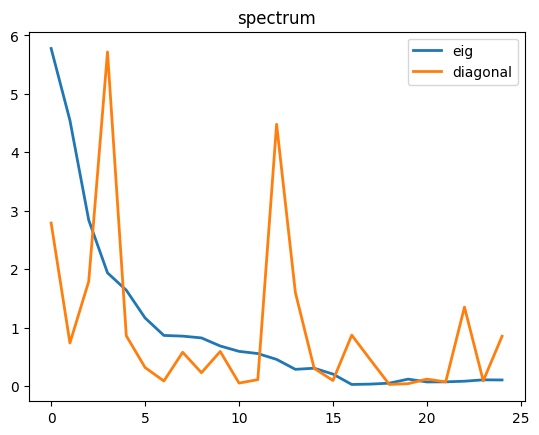

Test mean squared error after transformation: 0.32581642413818873
Simulation: 2
Test mean squared error before transformation: 0.3426397744081066


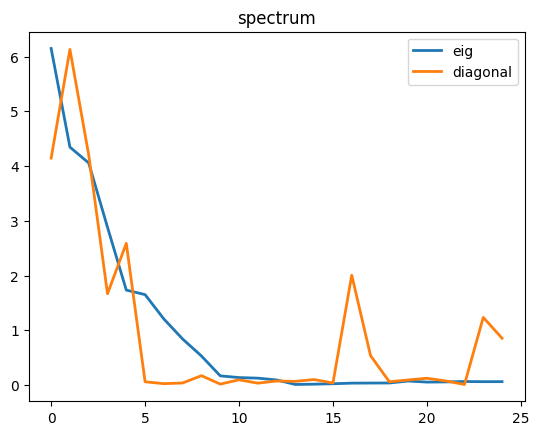

Test mean squared error after transformation: 0.3119326985619862
Simulation: 3
Test mean squared error before transformation: 0.3419824486260707


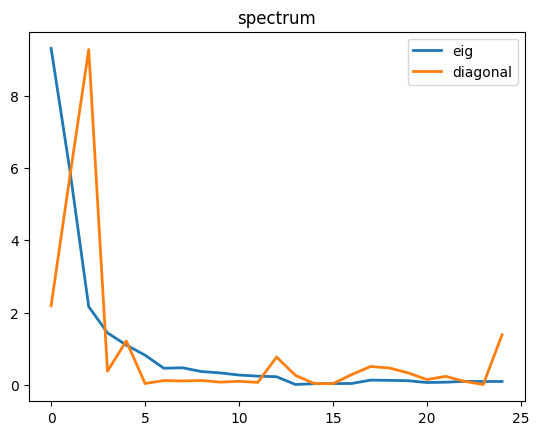

Test mean squared error after transformation: 0.31239502555459353
Simulation: 4
Test mean squared error before transformation: 0.3437317071349535


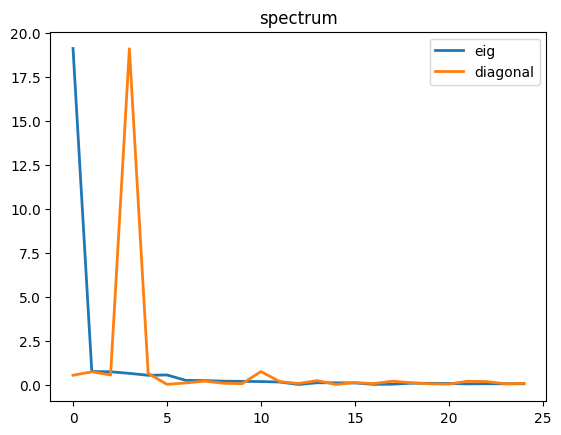

Test mean squared error after transformation: 0.30708587594447473
number of training samples: 5000
Simulation: 0
Test mean squared error before transformation: 0.34393205479272126


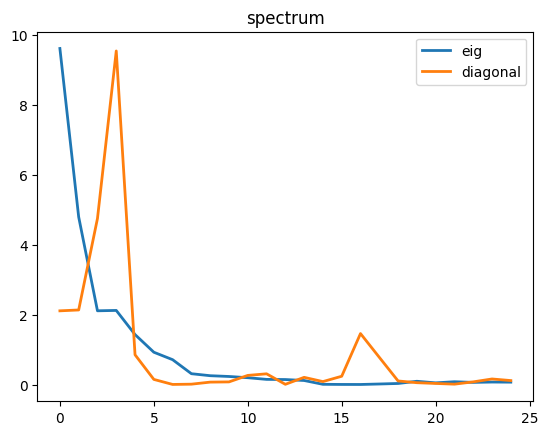

Test mean squared error after transformation: 0.310619875154349
Simulation: 1
Test mean squared error before transformation: 0.34372471133476873


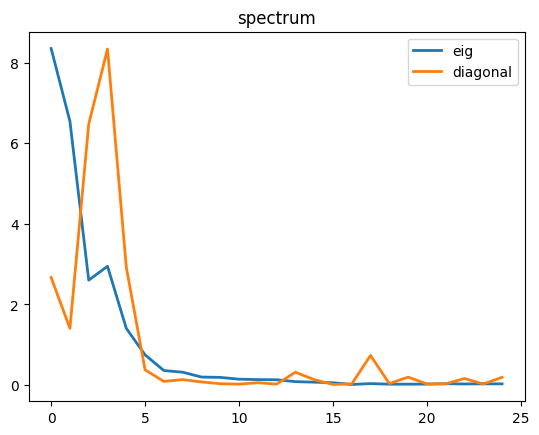

Test mean squared error after transformation: 0.2999670028399329
Simulation: 2
Test mean squared error before transformation: 0.3415442575252323


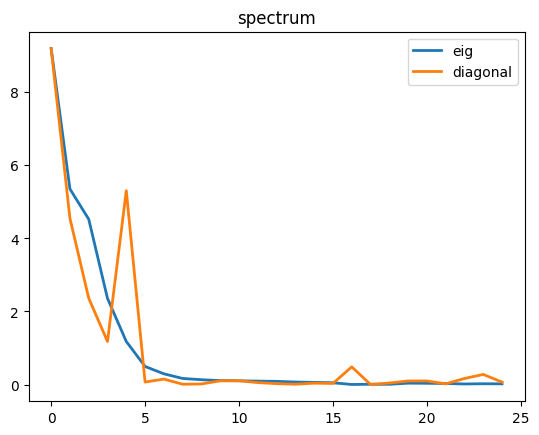

Test mean squared error after transformation: 0.29616208364198154
Simulation: 3
Test mean squared error before transformation: 0.3430433490574464


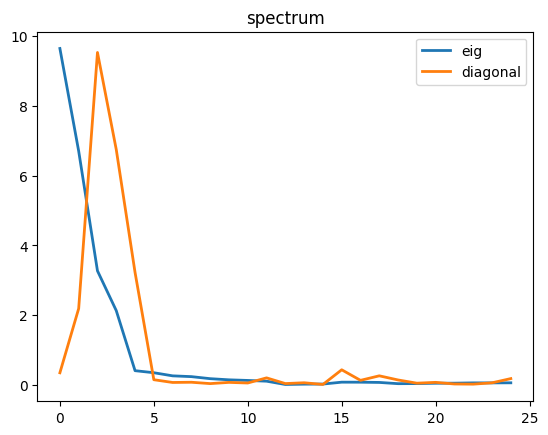

Test mean squared error after transformation: 0.29990899450646447
Simulation: 4
Test mean squared error before transformation: 0.3417399139549254


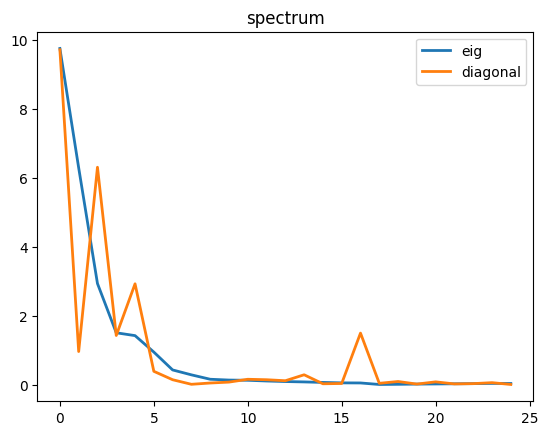

Test mean squared error after transformation: 0.2998662093490719
number of training samples: 7500
Simulation: 0
Test mean squared error before transformation: 0.3442567890654301


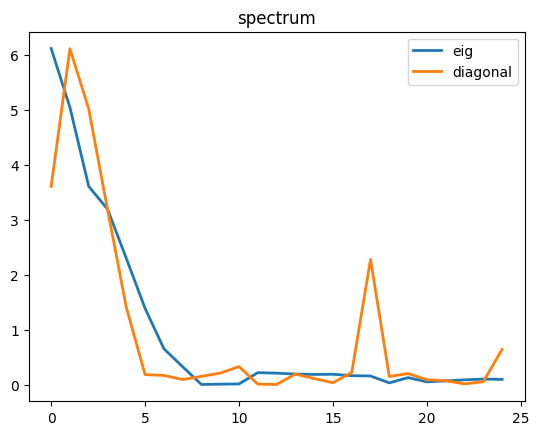

Test mean squared error after transformation: 0.30181908864989515
Simulation: 1
Test mean squared error before transformation: 0.34099185465836473


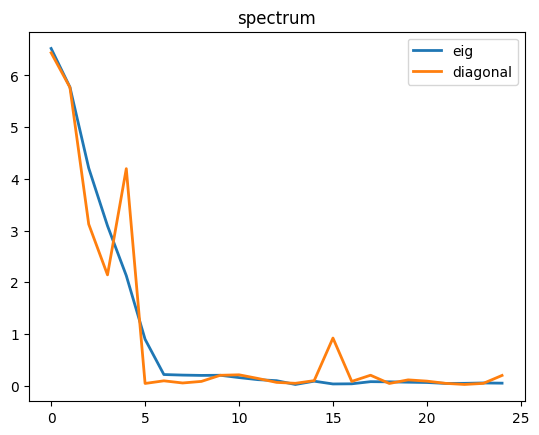

Test mean squared error after transformation: 0.29819411805845747
Simulation: 2
Test mean squared error before transformation: 0.34292810796572915


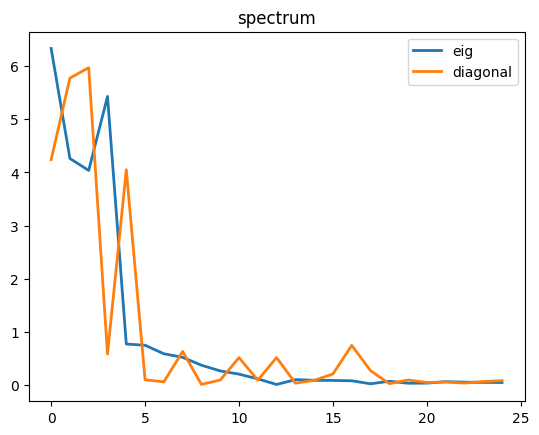

Test mean squared error after transformation: 0.3049229445884161
Simulation: 3
Test mean squared error before transformation: 0.3425515211212134


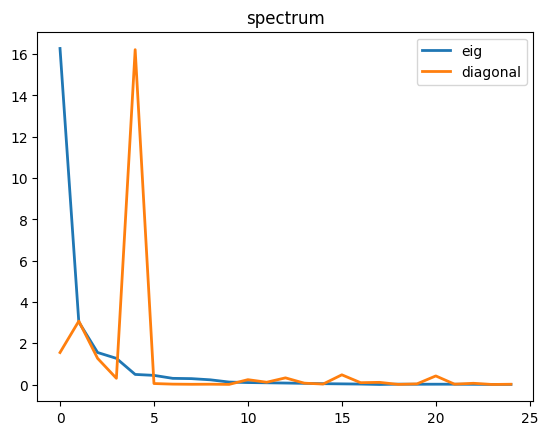

Test mean squared error after transformation: 0.30164348912629085
Simulation: 4
Test mean squared error before transformation: 0.3407162720155671


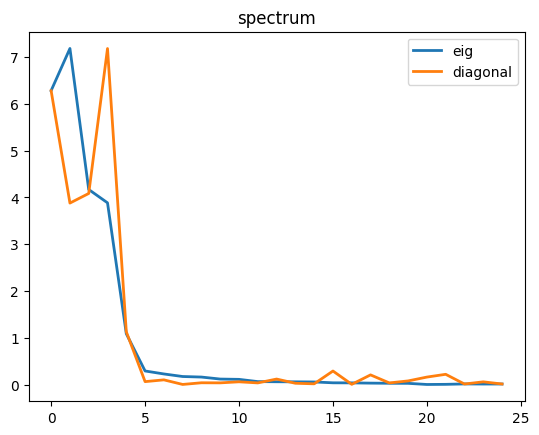

Test mean squared error after transformation: 0.2959335889603507
number of training samples: 10000
Simulation: 0
Test mean squared error before transformation: 0.34453644672531236


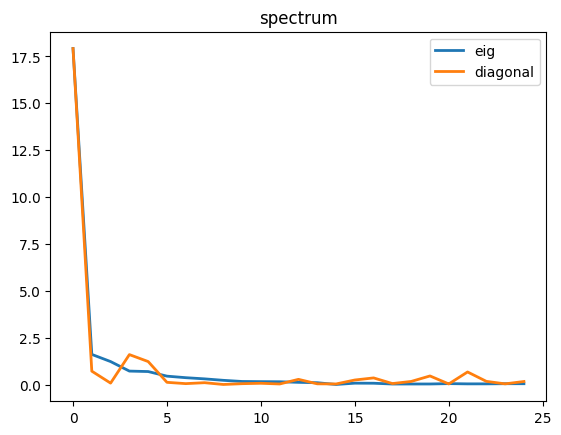

Test mean squared error after transformation: 0.30763399788499285
Simulation: 1
Test mean squared error before transformation: 0.3455284508650149


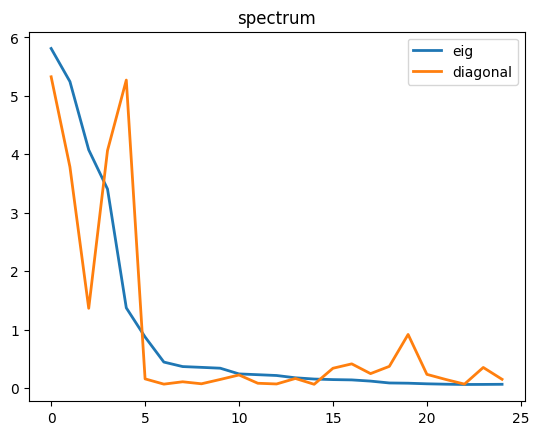

Test mean squared error after transformation: 0.30338757379914694
Simulation: 2
Test mean squared error before transformation: 0.3411953304002207


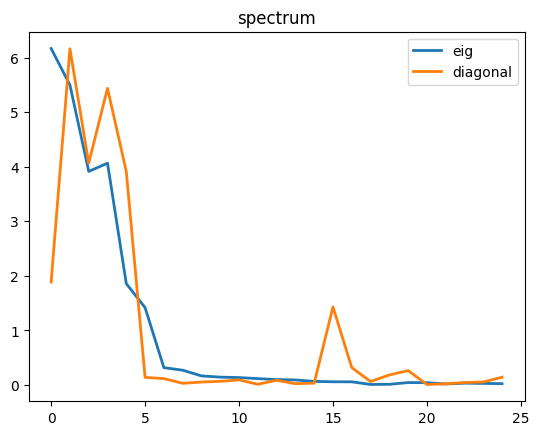

Test mean squared error after transformation: 0.2993450867584772
Simulation: 3
Test mean squared error before transformation: 0.34414926749680874


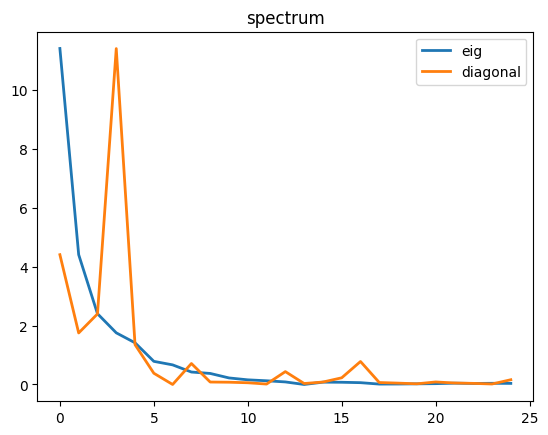

Test mean squared error after transformation: 0.298419303343047
Simulation: 4
Test mean squared error before transformation: 0.34136702472408614


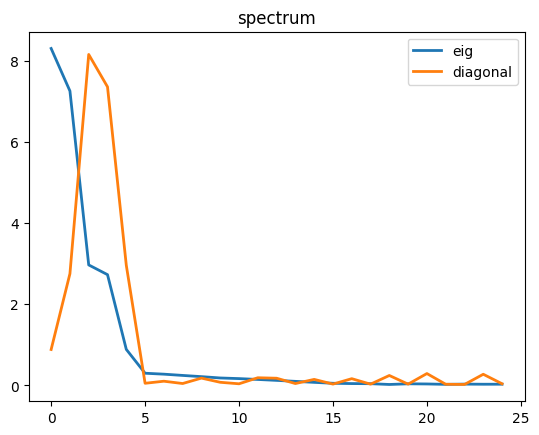

Test mean squared error after transformation: 0.2981955019459958
number of training samples: 15000
Simulation: 0
Test mean squared error before transformation: 0.34236381794834164


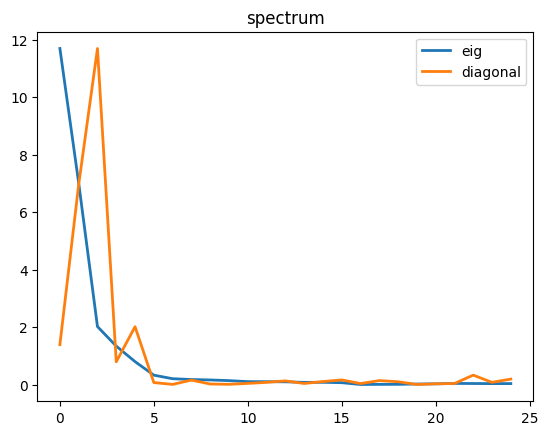

Test mean squared error after transformation: 0.30122371639637363
Simulation: 1
Test mean squared error before transformation: 0.34025542167864165


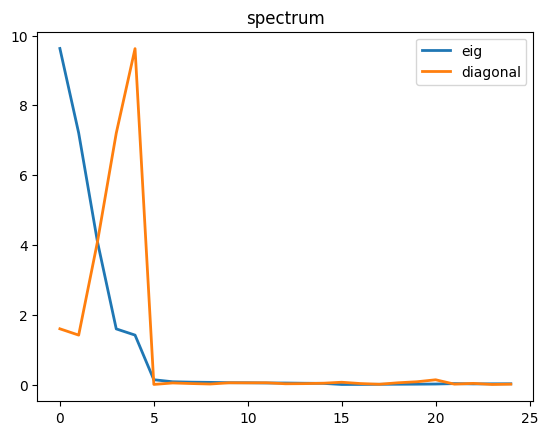

Test mean squared error after transformation: 0.29771996593210526
Simulation: 2
Test mean squared error before transformation: 0.3386441590318097


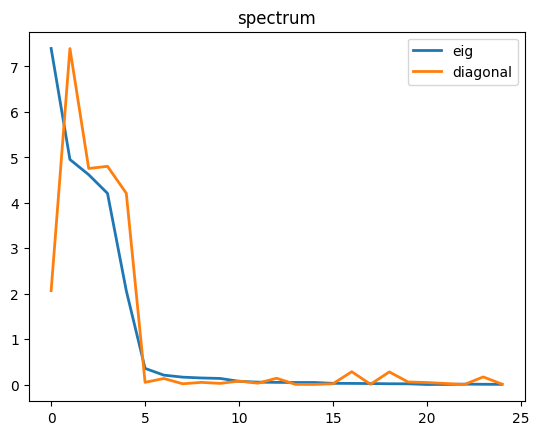

Test mean squared error after transformation: 0.30083346842918474
Simulation: 3
Test mean squared error before transformation: 0.3445518282879033


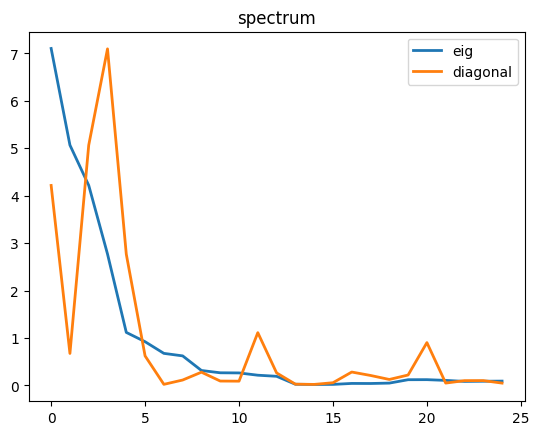

Test mean squared error after transformation: 0.30461255357275074
Simulation: 4
Test mean squared error before transformation: 0.3425520426843196


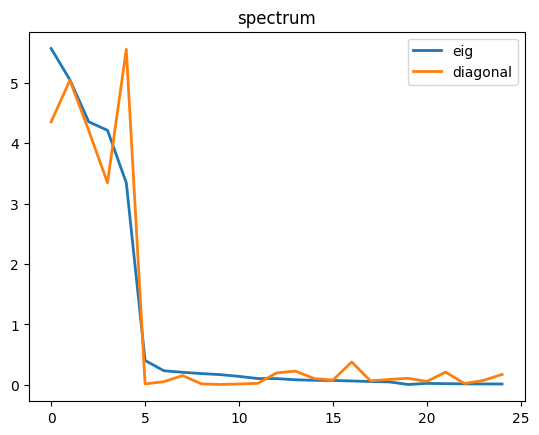

Test mean squared error after transformation: 0.2997223268698553
number of training samples: 20000
Simulation: 0
Test mean squared error before transformation: 0.34299161753651597


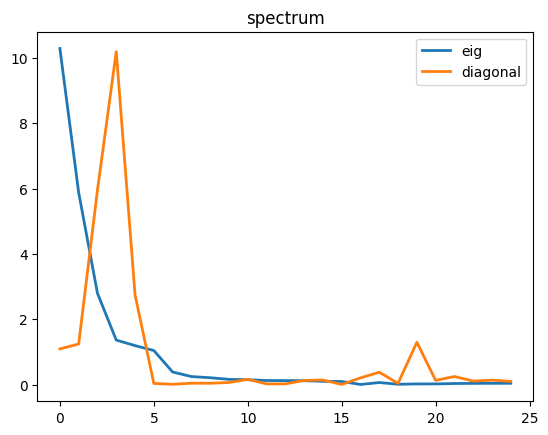

Test mean squared error after transformation: 0.30603697169682975
Simulation: 1
Test mean squared error before transformation: 0.34341737807220846


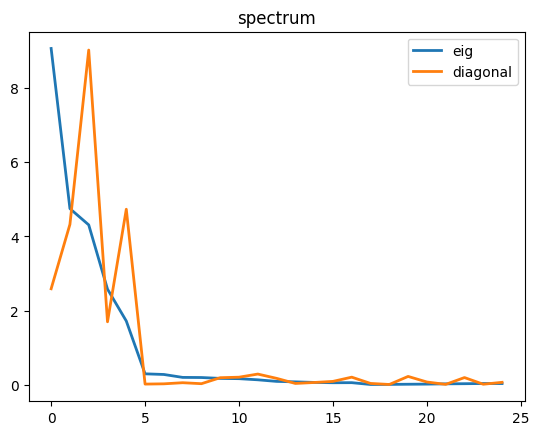

Test mean squared error after transformation: 0.3018152999445116
Simulation: 2
Test mean squared error before transformation: 0.34089448504847686


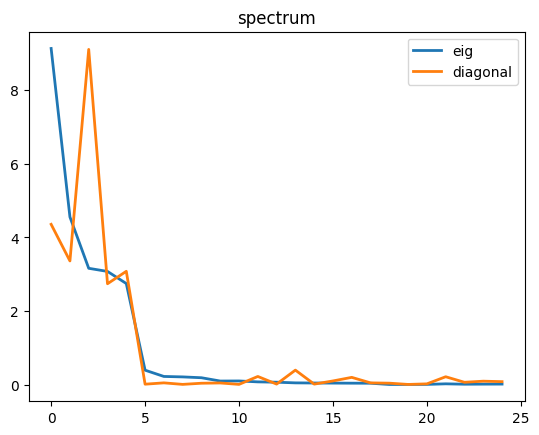

Test mean squared error after transformation: 0.29554326396399755
Simulation: 3
Test mean squared error before transformation: 0.3411210543045468


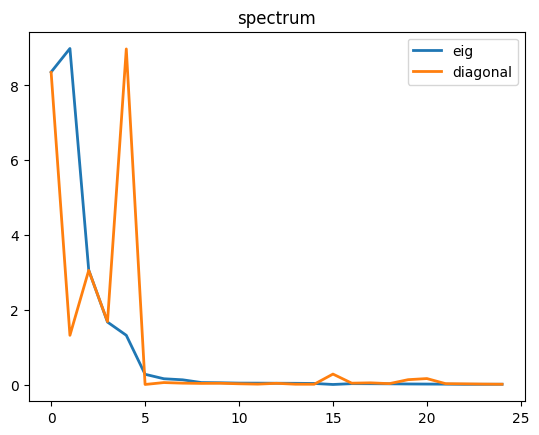

Test mean squared error after transformation: 0.29628371898896266
Simulation: 4
Test mean squared error before transformation: 0.3416204968191316


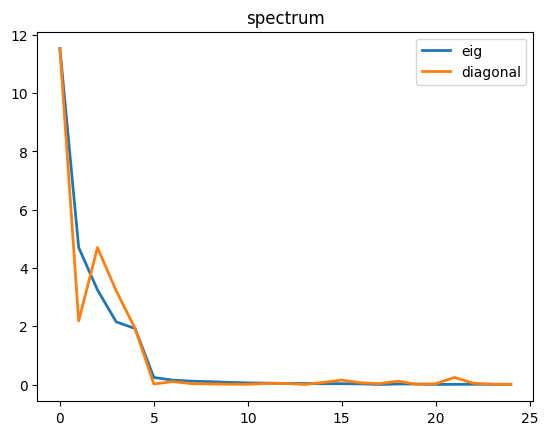

Test mean squared error after transformation: 0.2963615522682097


In [2]:
stats = []

for n_sim in sample_range:
    print(f"number of training samples: {n_sim}")
    mse = {'n': n_sim, 'before': [], "after": []}
    for round in range(5):
        print(f"Simulation: {round}")
        mse_before, mse_after = simulate(x_train[:n_sim, ], y_train[:n_sim], x_test, y_test, M, lifetime_max, delta, weights_lifetime)
        mse['before'].append(mse_before)
        mse['after'].append(mse_after)
    stats.append(mse)

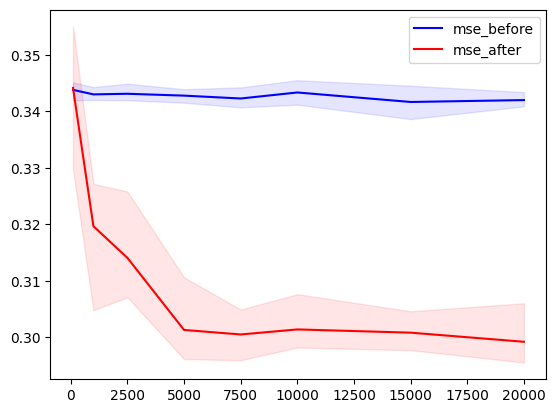

In [3]:
x = sample_range
before = []
before_min = []
before_max = []
after = []
after_min = []
after_max = []

for stat in stats:
    before.append(np.mean(stat['before']))
    before_min.append(np.min(stat['before']))
    before_max.append(np.max(stat['before']))
    after.append(np.mean(stat['after']))
    after_min.append(np.min(stat['after']))
    after_max.append(np.max(stat['after']))

fig, ax = plt.subplots()
ax.plot(x, before, color='b')
ax.plot(x, after, color='r')
ax.fill_between(x, (before_min), (before_max), color='b', alpha=.1)
ax.fill_between(x, (after_min), (after_max), color='r', alpha=.1)

plt.legend(["mse_before", "mse_after"], loc ="upper right")

pickle.dump(stats, open("stats.pk", "wb"))

In [4]:
stats_best = {}
best = {}

for multiplier in range(1,3):
    print(f"lifetime multiplier: {multiplier}")
    stats_best[multiplier] = []
    best[multiplier] = {"mean": [], "min": [], "max": []}
    for n_sim in sample_range:
        stats_temp = []
        print(f"number of training samples: {n_sim}")
        mse = {'n': n_sim, 'best': []}
        for round in range(5):
            print(f"Simulation: {round}")
            mse_best = simulate_best(x_train[:n_sim, ], y_train[:n_sim], x_test, y_test, M, lifetime_max * (multiplier), delta, weights_lifetime)
            mse['best'].append(mse_best)
            print(mse_best)
        stats_best[multiplier].append(mse)
        best[multiplier]["mean"].append(np.mean(mse['best']))
        best[multiplier]["min"].append(np.min(mse['best']))
        best[multiplier]["max"].append(np.max(mse['best']))

pickle.dump(stats_best, open("stats_best.pk", "wb"))

lifetime multiplier: 1
number of training samples: 100
Simulation: 0
0.31775299420763575
Simulation: 1
0.32432817355327875
Simulation: 2
0.3223233549722342
Simulation: 3
0.31434189764447634
Simulation: 4
0.3050060034939734
number of training samples: 1000
Simulation: 0
0.3268559248900954
Simulation: 1
0.31158221620853677
Simulation: 2
0.3184994672406198
Simulation: 3
0.3212367534012519
Simulation: 4
0.32190884850823787
number of training samples: 2500
Simulation: 0
0.3199578749232843
Simulation: 1
0.3210232417788847
Simulation: 2
0.3177746418074915
Simulation: 3
0.3171503294270673
Simulation: 4
0.316578392083774
number of training samples: 5000
Simulation: 0
0.30627495566190543
Simulation: 1
0.3173153926961982
Simulation: 2
0.3133506747733882
Simulation: 3
0.32195037916774766
Simulation: 4
0.3135876592626128
number of training samples: 7500
Simulation: 0
0.31961536498372345
Simulation: 1
0.31363276646874044
Simulation: 2
0.31243585993466244
Simulation: 3
0.3213528860348551
Simulation: 

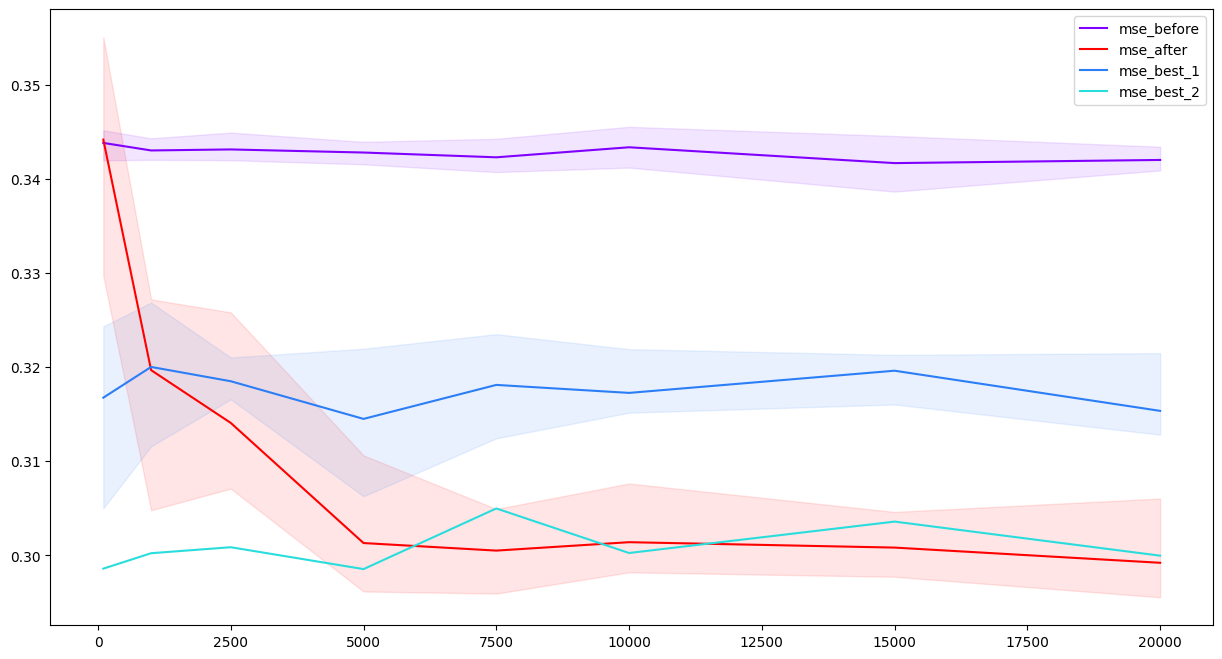

In [5]:
colors = plt.cm.rainbow(np.linspace(0, 1, 7))

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(x, before, color=colors[0])
ax.plot(x, after, color=colors[6])
for multiplier in range(1,3):
    ax.plot(x, best[multiplier]["mean"], color=colors[multiplier])
plt.legend(["mse_before", "mse_after", "mse_best_1", "mse_best_2", "mse_best_3", "mse_best_4", "mse_best_5"], loc ="upper right")
ax.fill_between(x, (before_min), (before_max), color=colors[0], alpha=.1)
ax.fill_between(x, (after_min), (after_max), color=colors[6], alpha=.1)
for multiplier in range(1,2):
    ax.fill_between(x, (best[multiplier]["min"]), (best[multiplier]["max"]), color=colors[multiplier], alpha=.1)

In [3]:
stats = pickle.load(open("stats.pk", "rb"))
x = sample_range
before = []
before_min = []
before_max = []
after = []
after_min = []
after_max = []

for stat in stats:
    before.append(np.mean(stat['before']))
    before_min.append(np.min(stat['before']))
    before_max.append(np.max(stat['before']))
    after.append(np.mean(stat['after']))
    after_min.append(np.min(stat['after']))
    after_max.append(np.max(stat['after']))

In [4]:
from Mondrian_matrix_utils import simulate_proj

stats_best = {}
best = {}

for multiplier in range(1,3):
    print(f"lifetime multiplier: {multiplier}")
    stats_best[multiplier] = []
    best[multiplier] = {"mean": [], "min": [], "max": []}
    for n_sim in sample_range:
        stats_temp = []
        print(f"number of training samples: {n_sim}")
        mse = {'n': n_sim, 'best': []}
        for round in range(5):
            print(f"Simulation: {round}")
            mse_best = simulate_proj(x_train[:n_sim, ], y_train[:n_sim], x_test, y_test, M, lifetime_max * (multiplier), delta, weights_lifetime)
            mse['best'].append(mse_best)
            print(mse_best)
        stats_best[multiplier].append(mse)
        best[multiplier]["mean"].append(np.mean(mse['best']))
        best[multiplier]["min"].append(np.min(mse['best']))
        best[multiplier]["max"].append(np.max(mse['best']))

pickle.dump(stats_best, open("stats_proj.pk", "wb"))

lifetime multiplier: 1
number of training samples: 100
Simulation: 0
0.2896217822212528
Simulation: 1
0.2836199482587873
Simulation: 2
0.29086558434567406
Simulation: 3
0.2863366526419756
Simulation: 4
0.29099566613795486
number of training samples: 1000
Simulation: 0
0.30446341201763855
Simulation: 1
0.3002701355871883
Simulation: 2
0.3021254694779702
Simulation: 3
0.3034172682563698
Simulation: 4
0.29636615304938857
number of training samples: 2500
Simulation: 0
0.3043004256210252
Simulation: 1
0.3003173682476664
Simulation: 2
0.29788945859409266
Simulation: 3
0.3018582121450089
Simulation: 4
0.30230211191963885
number of training samples: 5000
Simulation: 0
0.299361600301556
Simulation: 1
0.2979452623671569
Simulation: 2
0.29350804411363257
Simulation: 3
0.30259935984209796
Simulation: 4
0.2975833804132955
number of training samples: 7500
Simulation: 0
0.3005250071627944
Simulation: 1
0.3000021469509084
Simulation: 2
0.29813597899169597
Simulation: 3
0.29944935736696443
Simulation: 

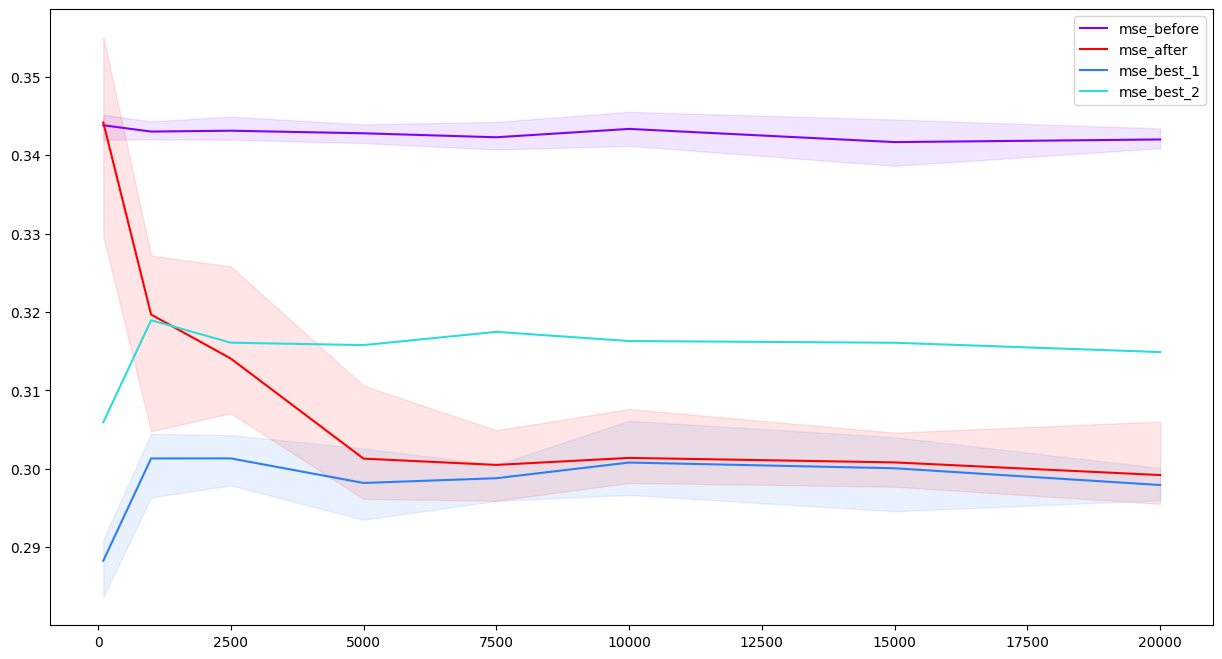

In [5]:
colors = plt.cm.rainbow(np.linspace(0, 1, 7))

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(x, before, color=colors[0])
ax.plot(x, after, color=colors[6])
for multiplier in range(1,3):
    ax.plot(x, best[multiplier]["mean"], color=colors[multiplier])
plt.legend(["mse_before", "mse_after", "mse_best_1", "mse_best_2", "mse_best_3", "mse_best_4", "mse_best_5"], loc ="upper right")
ax.fill_between(x, (before_min), (before_max), color=colors[0], alpha=.1)
ax.fill_between(x, (after_min), (after_max), color=colors[6], alpha=.1)
for multiplier in range(1,2):
    ax.fill_between(x, (best[multiplier]["min"]), (best[multiplier]["max"]), color=colors[multiplier], alpha=.1)